> 패스트캠퍼스 바이트디그리 데이터사이언스 과정 실전 데이터 분석 및 데이터 시각화 수업 내용을 정리한 자료입니다.
> sample 데이터의 경우 패캠 저작권 문제로 실습 진행 후 jupyter notebook에서 출력된 결과는 제거한 뒤 Repository에 push하였습니다.

### 고객 데이터 분석

#### 데이터 출처: UCI Machine Learning Repository
  - [데이터 다운로드](https://archive.ics.uci.edu/ml/datasets/bank+marketing)

#### Reference
  - S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014**

### 데이터 소개
  - 해외 특정 은행이 진행한 마케팅 데이터
  - Outbount 텔레마케팅 데이터

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# matplotlib에서 한글깨짐 현상 해결
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False 

# [출처] 파이썬 그래프 한글이 깨질때&마이너스 부호 사용 | 작성자 데이터공방(https://blog.naver.com/kiddwannabe/221202864701)

In [8]:
# data load
# error가 발생할 경우 engine = 'python' 추가
df = pd.read_csv('d:/bank-additional-full.csv')
df.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


> df.head() 결과 데이터가 정상적으로 출력되지 않는 것을 확인할 수 있다. 이러한 경우 해당 파일을 직접 열어 csv 파일의 구분자가 콤마(,)인지 확인하고 콤마가 아닌경우 read_csv()에서 `sep=` 인자를 해당 구분자로 넣어주어야 한다. 해당 샘플 데이터의 경우 구분자가 콜론(;)으로 되어 있으므로 `sep=';'`을 파라미터로 지정해주어야 한다.

In [12]:
df = pd.read_csv('d:/bank-additional-full.csv', sep=';')
df.head() # 데이터가 정상적으로 출력되는 것을 확인할 수 있다.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


---

### 데이터 탐색
  - 데이터 탐색과정에서 사용되는 함수를 살펴본다.
  - `head()`, `tail()`

In [13]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [15]:
# parameter로 행의 개수를 전달할 수 있다.
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [16]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


---

### 결측치(Missing Value) 데이터 확인
  - `isnull()` 함수

In [18]:
# 각 컬럼의 결측치를 확인할 수 있음
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [20]:
# shape - dataframe의 크기(행, 열) 확인
df.shape

(41188, 21)

In [22]:
# describe() - 각 컬럼에 대한 기술 통계량 확인
# 데이터의 수, 평균, 표준편차, 최소값, 1사분위수, 2사분위수, 3사분위수, 최대값
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [25]:
# 각 컬럼명 확인
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [26]:
# 각 컬럼의 고유값 확인
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [27]:
# 각 컬럼의 고유값 빈도
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [30]:
# 고유값 확인 및 빈도 복습
# marital 컬럼
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [31]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

---

### 데이터 시각화
  - 데이터를 가공/전처리하여 그래프 형태로 시각화
  - 대량의 데이터로부터 패턴을 분석할 수 있음

In [32]:
df['age']

0        56
1        57
2        37
3        40
4        56
         ..
41183    73
41184    46
41185    56
41186    44
41187    74
Name: age, Length: 41188, dtype: int64

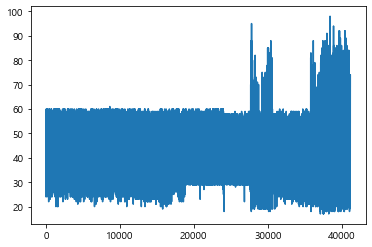

In [33]:
df['age'].plot()
plt.show()

#### 위의 그래프로는 데이터로부터 어떤 패턴이나 인사이트를 얻기 어려움 -> 전처리 과정 필요

In [35]:
# 데이터 오름차순 정렬
age = df['age'].sort_values()
age

38274    17
37579    17
37539    17
37140    17
37558    17
         ..
40450    92
38921    94
27826    95
38455    98
38452    98
Name: age, Length: 41188, dtype: int64

In [38]:
# 오름차순 정렬된 데이터의 index를 다시 생성하는 과정이 필요
# reset_index() 함수 이용
age = age.reset_index()
age 

,level_0,index,age
0,0,38274,17
1,1,37579,17
2,2,37539,17
3,3,37140,17
4,4,37558,17
...,...,...,...
41183,41183,40450,92
41184,41184,38921,94
41185,41185,27826,95
41186,41186,38455,98


In [45]:
# 기존 index는 index 컬럼에 표시되므로 drop 함수를 이용하여 기존 index 컬럼은 삭제한다.
age = age.drop('index', axis=1)

In [46]:
age

,age
0,17
1,17
2,17
3,17
4,17
...,...
41183,92
41184,94
41185,95
41186,98


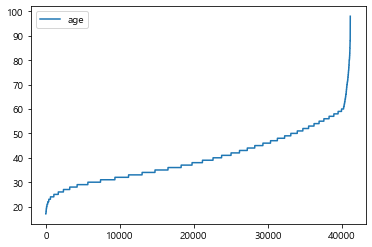

In [48]:
# 데이터를 오름차순으로 정렬한 결과 그래프
# 일반적으로 나이는 10대, 20대, 30대 등으로 구분하여 데이터를 확인
age.plot()
plt.show()

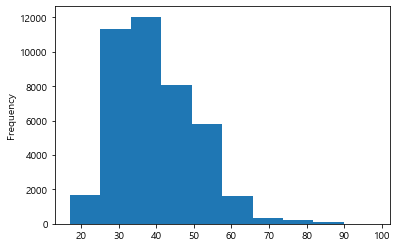

In [49]:
# 계급간 빈도를 나타내주는 히스토그램
df['age'].plot.hist()
plt.show()

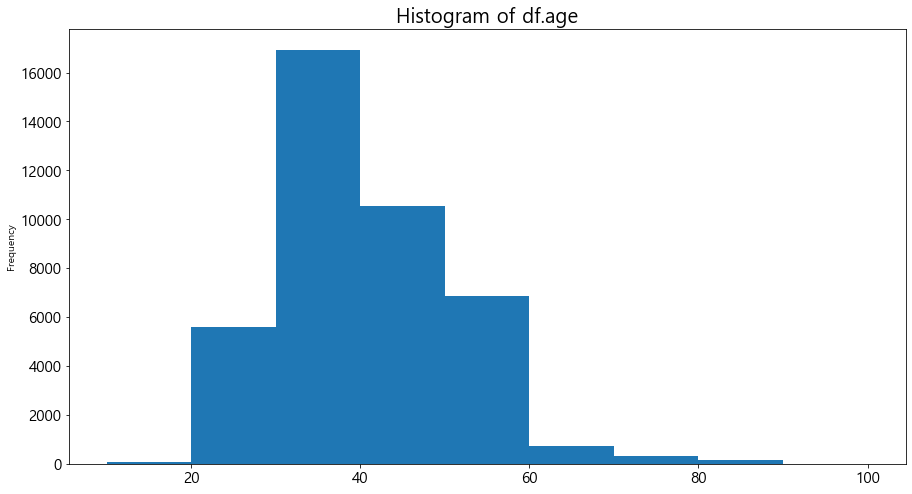

In [50]:
# 히스토그램을 더 세부적으로 확인하는 방법
# bins - 계급구간 지정
# figsize - 그래프 크기 지정
# xticks(fontsize=), yticks(fontsize=) -> x, y축 라벨 font size 지정
# plt.title() - 그래프 title 지정
df['age'].plot.hist(bins=range(10, 101, 10), figsize=[15, 8])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Histogram of df.age', fontsize=20)
plt.show()

---

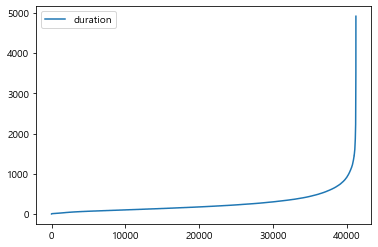

In [51]:
# 데이터 시각화 예제2 
# duration(전화통화시간) 컬럼 값
(((df['duration'].sort_values()).reset_index()).drop('index', axis=1)).plot()
plt.show()

In [52]:
# 히스토그램으로 빈도 분석
df['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

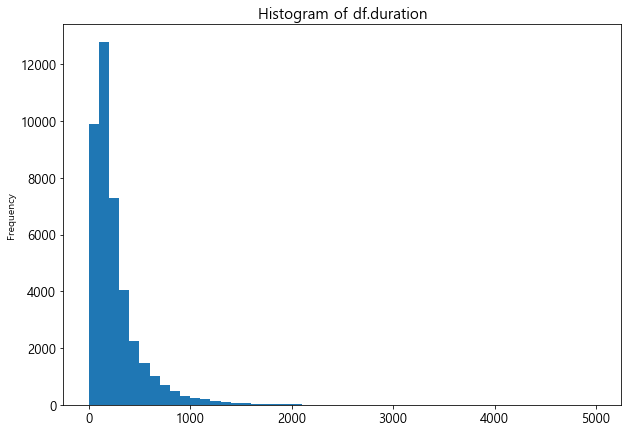

In [57]:
df['duration'].plot.hist(bins=range(0, 5001, 100), figsize=[10, 7])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Histogram of df.duration', fontsize=15)
plt.show()

---

#### 막대그래프, 가로막대 그래프

In [58]:
df['marital'].plot()
plt.show() 

TypeError: no numeric data to plot

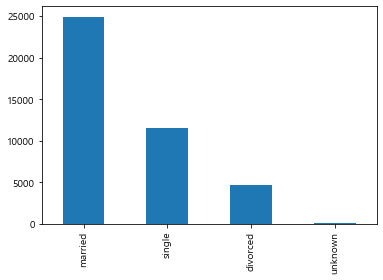

In [61]:
# TypeError: no numeric data to plot 발생 -> 데이터가 string 형태이기 때문에 그래프를 그릴 수 없음
# value_counts() 함수를 사용하여 시각화 가능
marital = df['marital'].value_counts()
marital.plot.bar()
plt.show()

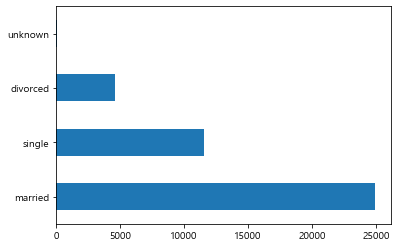

In [62]:
# 가로막대 그래프 시각화
marital.plot.barh()
plt.show()

In [64]:
# education 컬럼
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [68]:
education = df['education'].value_counts()

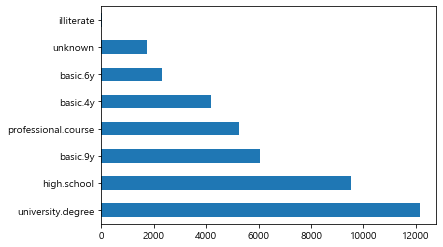

In [69]:
education.plot.barh()
plt.show()